In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_score

In [23]:
data = load_digits()
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [24]:
data['data'].shape

(1797, 64)

In [25]:
data['data'][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [26]:
data.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 432x288 with 0 Axes>

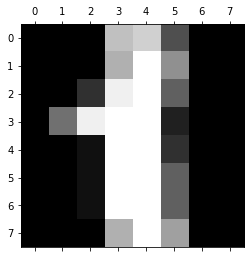

In [27]:
plt.gray()
plt.matshow(data.images[1])
plt.show()

In [28]:
data['target'][1]

1

In [29]:
data['feature_names']

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

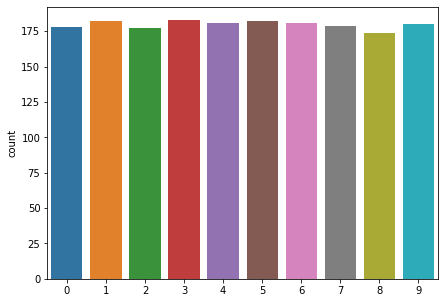

In [30]:
plt.figure(figsize=(7,5)) #Cantidad de imagenes que tenemos clasificadas en cada número
sns.countplot(x=data['target'])
plt.show()

In [31]:
X_standardized = StandardScaler().fit_transform(data['data']) #Estadariza los datos dee entrada nada más las alidas no se 
                                                              #estandrizan ya que estos datos me clasifican
X_train, X_test, y_train, y_test = train_test_split(
    X_standardized, data['target'], train_size=0.7, random_state=7) #Dividimos 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html#sklearn.metrics.DistanceMetric

In [34]:
model = KNeighborsClassifier(n_neighbors=3,metric='euclidean').fit(X_train, y_train)

In [35]:
precision_score(y_train, model.predict(X_train), average=None) 
#precision_score no saca la exactitid general sino la presición por categoría

array([1.        , 0.98449612, 0.96875   , 0.97709924, 1.        ,
       0.99242424, 0.98518519, 0.99224806, 0.97297297, 0.98360656])

https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f

Target: 0 - Precision: 1.0
Target: 1 - Precision: 0.98
Target: 2 - Precision: 0.97
Target: 3 - Precision: 0.98
Target: 4 - Precision: 1.0
Target: 5 - Precision: 0.99
Target: 6 - Precision: 0.99
Target: 7 - Precision: 0.99
Target: 8 - Precision: 0.97
Target: 9 - Precision: 0.98


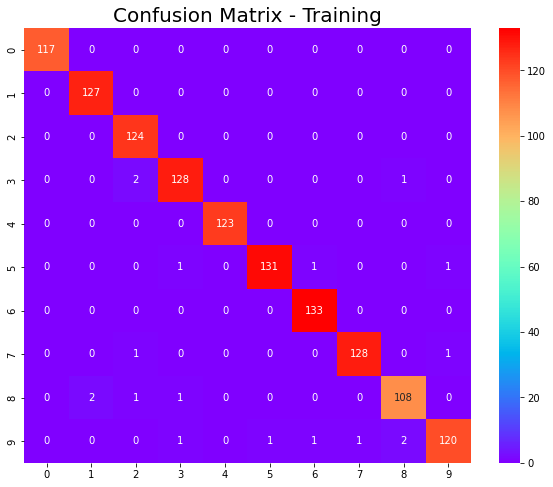

In [36]:
for target,precision in enumerate(precision_score(y_train, model.predict(X_train), average=None).round(2)):
    print(f"Target: {target} - Precision: {precision}")
plt.figure(figsize=(10,8))
plt.title("Confusion Matrix - Training",size=20)
sns.heatmap(
    confusion_matrix(y_train,model.predict(X_train)),
    annot=True,
    fmt="d",
    cmap="rainbow"
    )
plt.show()

#La diagonal principal debería tener exactamente numeros
#La diagonal principal representa cuantas veces clasifico correctamente el número
#El eje x es el real,y el y es el obtenido

Target: 0 - Precision: 1.0
Target: 1 - Precision: 0.92
Target: 2 - Precision: 1.0
Target: 3 - Precision: 0.96
Target: 4 - Precision: 1.0
Target: 5 - Precision: 0.98
Target: 6 - Precision: 1.0
Target: 7 - Precision: 0.92
Target: 8 - Precision: 1.0
Target: 9 - Precision: 0.98


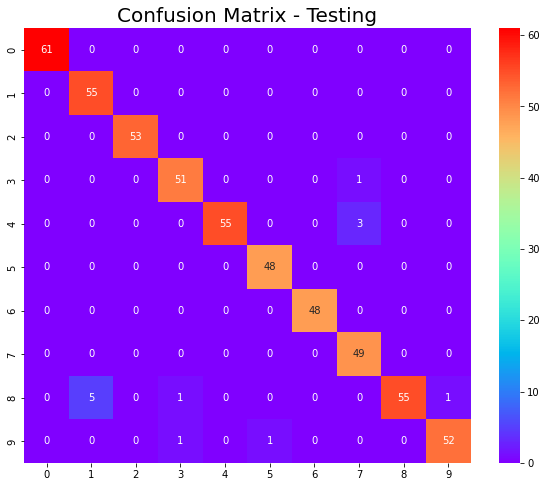

In [37]:
for target,precision in enumerate(precision_score(y_test, model.predict(X_test), average=None).round(2)):
    print(f"Target: {target} - Precision: {precision}")
plt.figure(figsize=(10,8))
plt.title("Confusion Matrix - Testing",size=20)
sns.heatmap(
    confusion_matrix(y_test,model.predict(X_test)),
    annot=True,
    fmt="d",
    cmap="rainbow"
    )
plt.show()